In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn import metrics as metrics
from sklearn.model_selection import train_test_split

# Import dataframes

In [2]:
df_train = pd.read_csv('data/train.csv', header=0) # -> treino
df_test = pd.read_csv('data/test.csv', header=0) # -> teste

In [3]:
display(df_train.head())
df_train.info()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
features = df_test.columns

df_train = df_train.dropna()
x = df_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
y = df_train['Transported']

In [5]:
train_x, val_x, train_y, val_y = train_test_split(x,y)

In [6]:
model = LinearSVC()
model.fit(x, y)

c:\Users\covin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [9]:
predictions = model.predict(x)
metrics.accuracy_score(y, predictions)

0.7332727823191039

# Feature engineering and data preparation

In [4]:
# Define the WIP DataFrame for backup
wip_df = df_train

- Working with HomePlanet

In [5]:
wip_df.HomePlanet = df_train.HomePlanet.fillna('No_Home')

In [6]:
#wip_df.HomePlanet = pd.Categorical(wip_df.HomePlanet)
#wip_df.HomePlanet = wip_df.HomePlanet.cat.codes

<AxesSubplot:xlabel='Age', ylabel='HomePlanet'>

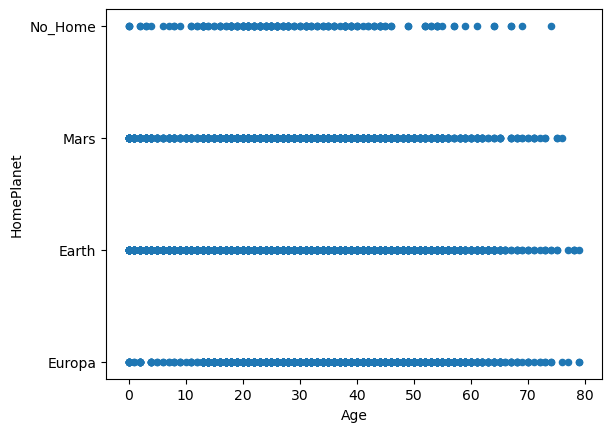

In [10]:
wip_df.plot.scatter('Age','HomePlanet')